## Introduction to Data Science
## Computer Assignment 2
### Professors: Bahrak and Yaghoob Zade
### Mohamad Mahdi Samadi 
### Kasra Ghorbani

In this task we are given a csv file containing data on the salaries of people working in the computer industry (mostly data scientists) from all over the world in the course of 5 years (2020 to 2024). Through graphing and some data analysis we shall gain some insight on this data.

## Import the necessary libraries.

In [30]:
from forex_python.converter import CurrencyRates
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

## Read the csv and convert currencies.
here we read the csv file using the pandas library and save it in a dataframe. In order to be able to compare and analyse the
salaries we need to first make sure they all share the same currency, so we convert all of them to USD$.  

In [31]:
df = pd.read_csv('task2_dataset.csv')

# Currency conversion to USD
cr = CurrencyRates()
currency_rates = {currency: cr.get_rate(
    currency, 'USD') for currency in df['Salary_Currency'].unique()}


def convert_to_usd(row):
    if row['Salary_Currency'] == 'USD':
        return row['Salary']
    else:
        try:
            return row['Salary'] * currency_rates[row['Salary_Currency']]
        except KeyError:
            print(f"Error converting {row['Salary_Currency']} to USD.")
            return row['Salary']


df['Salary'] = df.apply(convert_to_usd, axis=1)
df['Salary_Currency'] = 'USD'

We chose to keep most of the data since there was little to no data on some of the fields. For example only 12 freelancers were present in our dataset. But there was one particular person earning 80,000,000 in 2021 so we decided to exclude this fella. 

In [32]:
# Remove outlier data
max_salary_index = df['Salary'].idxmax()
df.drop(index=max_salary_index, inplace=True)

## Average salary by experience level over years
Here, using a line plot we show the average income of data scientists regardless of their fields and only based on experience levels. As expected the salary is as follows : Executive > Senior > Mid > Entry. The plot also indicates a small decline in earnings for most indivuals (other than executives!) but also indicates a great overall growth of income for all people working in this field within only 5 years!

<Figure size 1000x600 with 0 Axes>

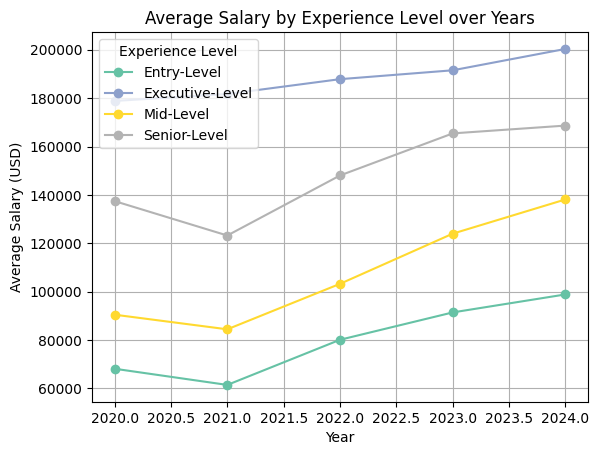

In [33]:
plt.figure(figsize=(10, 6))
average_salary = df.groupby(['Work_Year', 'Experience_Level'])[
    'Salary'].mean().unstack()
average_salary.plot(kind='line', marker='o', cmap='Set2')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level over Years')
plt.legend(title='Experience Level')
plt.grid(True)
plt.show()

## Top 10 lowest and highest paying jobs
Here using barplots the top 10 lowest and highest paying jobs are shown with the x axis being their salary. As expected the lower income jobs are held by simple Engineers,Analysts,... while the highest paying ones are the the head of each project or department.

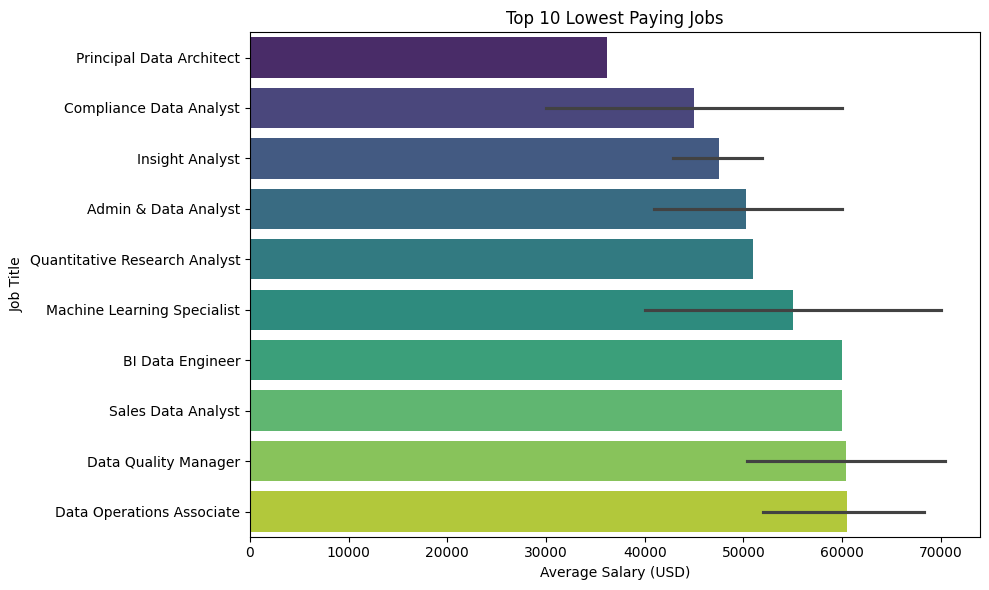

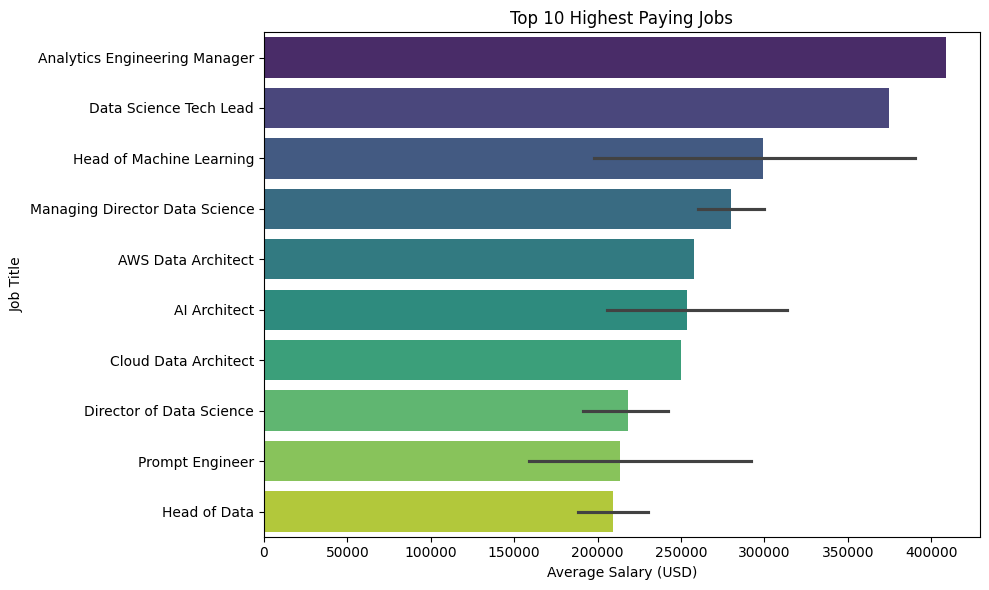

In [34]:
plt.figure(figsize=(10, 6))
avg_salary = df.groupby('Job_Title')['Salary'].mean().reset_index()
sorted_avg_salary = avg_salary.sort_values(by='Salary')
top_10_lowest_paying_jobs = sorted_avg_salary.head(10)
df_filtered = df[df['Job_Title'].isin(top_10_lowest_paying_jobs['Job_Title'])]
sns.barplot(x='Salary', y='Job_Title', data=df_filtered,
            order=top_10_lowest_paying_jobs['Job_Title'], palette='viridis')
plt.title('Top 10 Lowest Paying Jobs')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

# top 10 highest paying jobs
plt.figure(figsize=(10, 6))
avg_salary = df.groupby('Job_Title')['Salary'].mean().reset_index()
sorted_avg_salary = avg_salary.sort_values(by='Salary', ascending=False)
top_10_lowest_paying_jobs = sorted_avg_salary.head(10)
df_filtered = df[df['Job_Title'].isin(top_10_lowest_paying_jobs['Job_Title'])]
sns.barplot(x='Salary', y='Job_Title', data=df_filtered,
            order=top_10_lowest_paying_jobs['Job_Title'], palette='viridis')
plt.title('Top 10 Highest Paying Jobs')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

## Employment types based on company size
Using Piecharts for each company size we graphed different employment types. While the chart highlights no significant difference between the percentages for Mid-size and Big-size companies we can see that Small companies tend to offer more non-fulltime work (Ofcourse this is proportionate to their size)

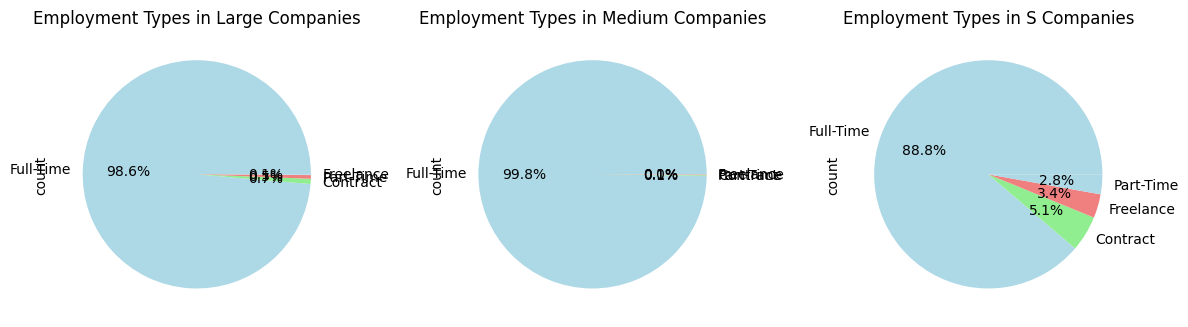

In [35]:
plt.figure(figsize=(12, 6))
company_sizes = df['Company_Size'].unique()
for i, size in enumerate(company_sizes, start=1):
    plt.subplot(1, len(company_sizes), i)
    df_filtered = df[df['Company_Size'] == size]
    employment_type_counts = df_filtered['Employment_Type'].value_counts()
    employment_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=[
                                'lightblue', 'lightgreen', 'lightcoral'])
    plt.title(f'Employment Types in {size} Companies')
plt.tight_layout()
plt.show()

## Top 10 frequent jobs
Here the top 10 most frequently held job titles by data scientists are shown by a bar-plot.

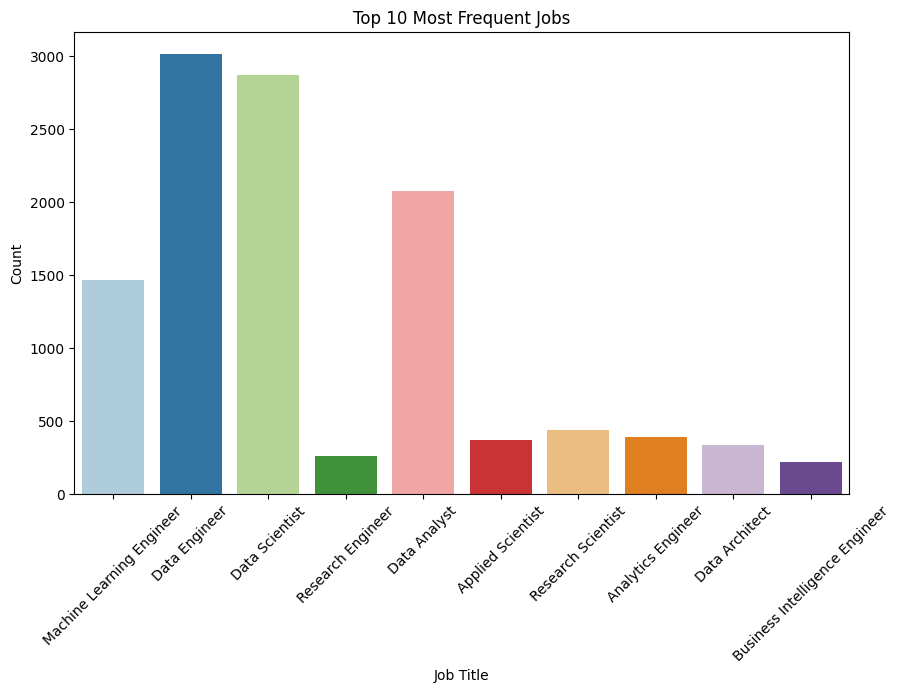

In [36]:
plt.figure(figsize=(10, 6))
top_10_jobs = df['Job_Title'].value_counts().nlargest(10).index
df_top_10_jobs = df[df['Job_Title'].isin(top_10_jobs)]
sns.countplot(x='Job_Title', data=df_top_10_jobs, palette='Paired')
plt.title('Top 10 Most Frequent Jobs')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Average salary of AI professionals over the years
Due to the massive breakthroughs made in the AI field in the last 1-2 years We decided to exclusively observe the salary growth of jobs containing "AI" in their title in the recent years and the growth as you can imagine is way higher than the average salary growth. Funny thing is even AI scientists had a decline in salary in 2021.

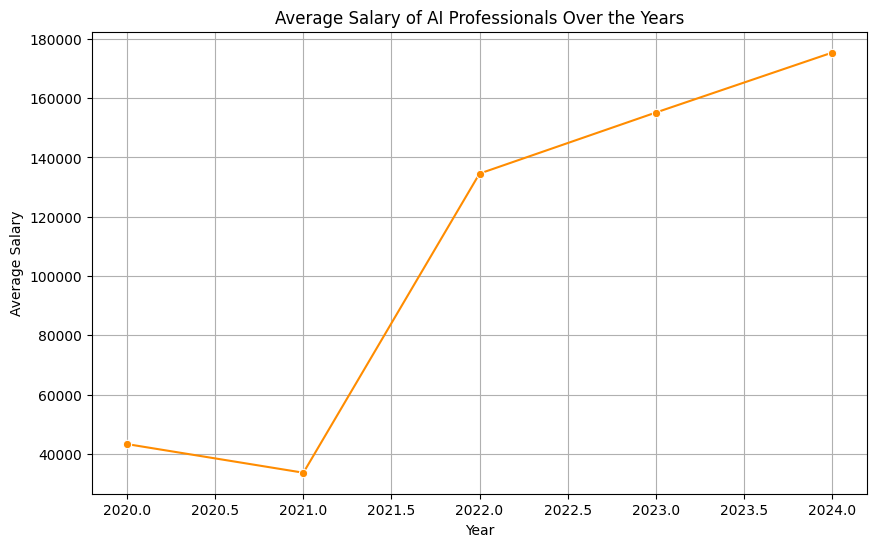

In [37]:
plt.figure(figsize=(10, 6))
df_ai_jobs = df[df['Job_Title'].str.contains('AI')]
average_salaries = df_ai_jobs.groupby('Work_Year')['Salary'].mean()
sns.lineplot(x=average_salaries.index, y=average_salaries.values,
             color='darkorange', marker='o')
plt.title('Average Salary of AI Professionals Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

## Company size vs salary
The relationship between company size and salary of the indivuals is examined. The violin plots show that there seems to be a relatively large difference among individual incomes within the same company size. There also seems to be more outlier data for medium size company employees. some of them earning as much as 800k a year! With the exclusion of these outliers it's safe to assume that there's not much salary difference when working for a medium or large company but working for a small company means having lower income.

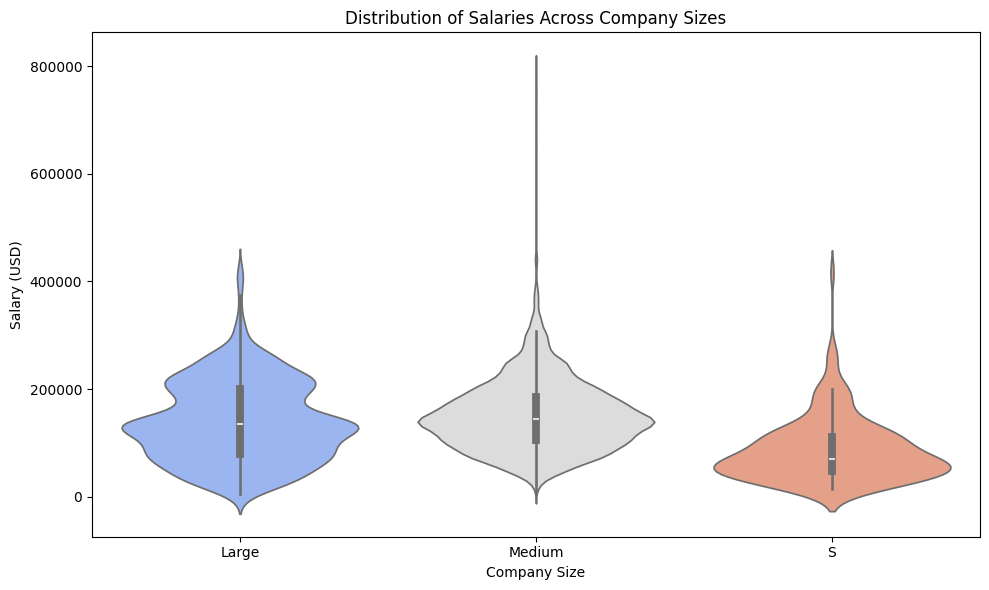

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Company_Size', y='Salary', data=df, palette='coolwarm')
plt.title('Distribution of Salaries Across Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

## distribution of different variables in the dataframe
the distribution of Salary, experience level, company size and employment type is investigated.
Here we show the number of people with different experience level using bar plots. Pie charts would've also been approprite. The result indicates that most people working in these field have Senior-level experince. This makes assuming only these 4 ranks are
available because only a few people reach executive level and other than that senior is the highest rank that can be reached by most people with enough time.
It seems as though 90 percent of the people in our data work for medium size companies. This is correct that most companies working in the data field are startups and midsize companies although I wasn't able to find an exact figure. But 90 percent might indicate a bias in our data.
The average salary seems to be around 150000$ (150033.14869465862$) and other than a small crookedness to the right it seems to follow a normal-like distribution. 

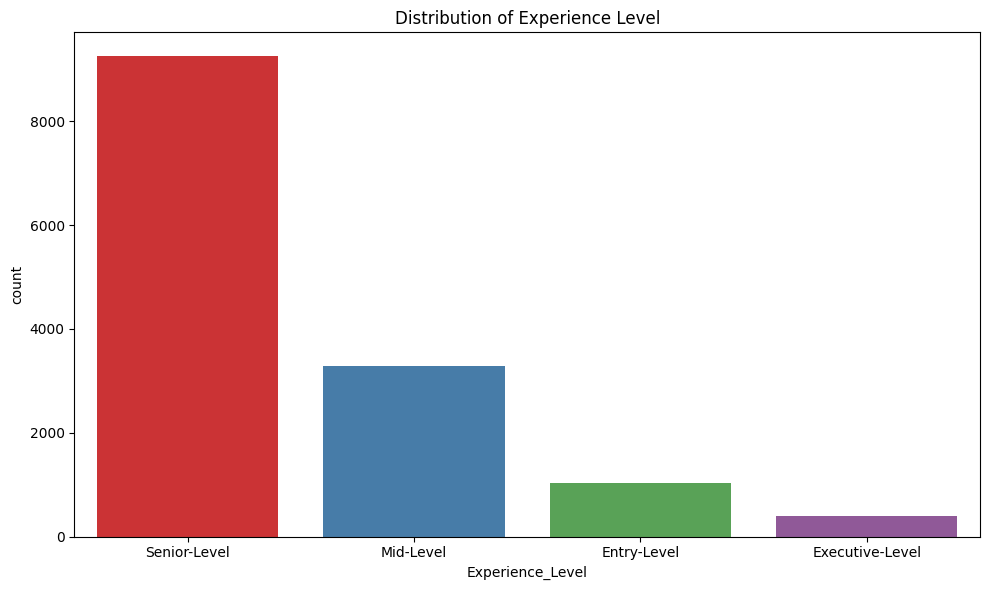

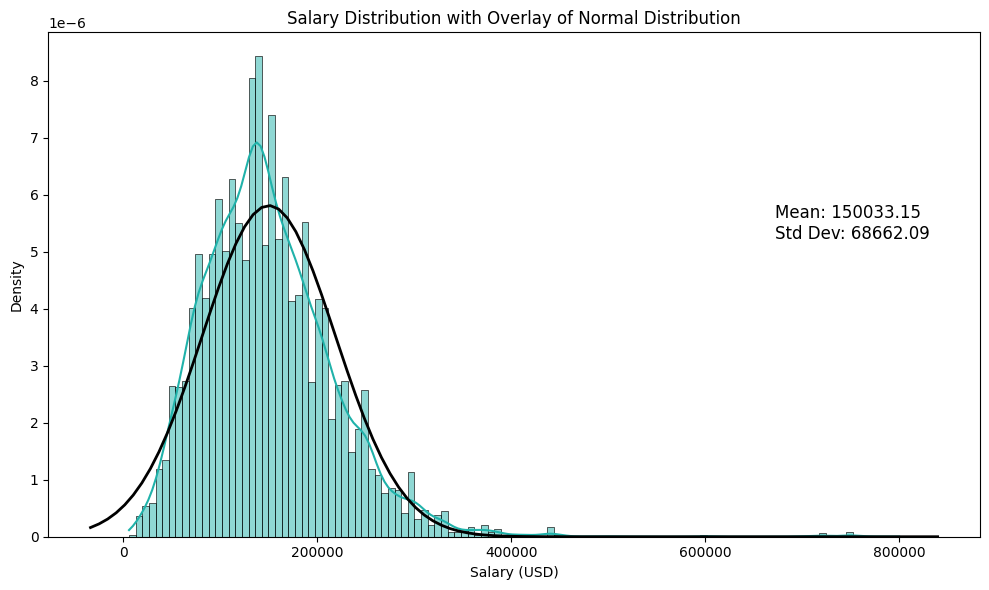

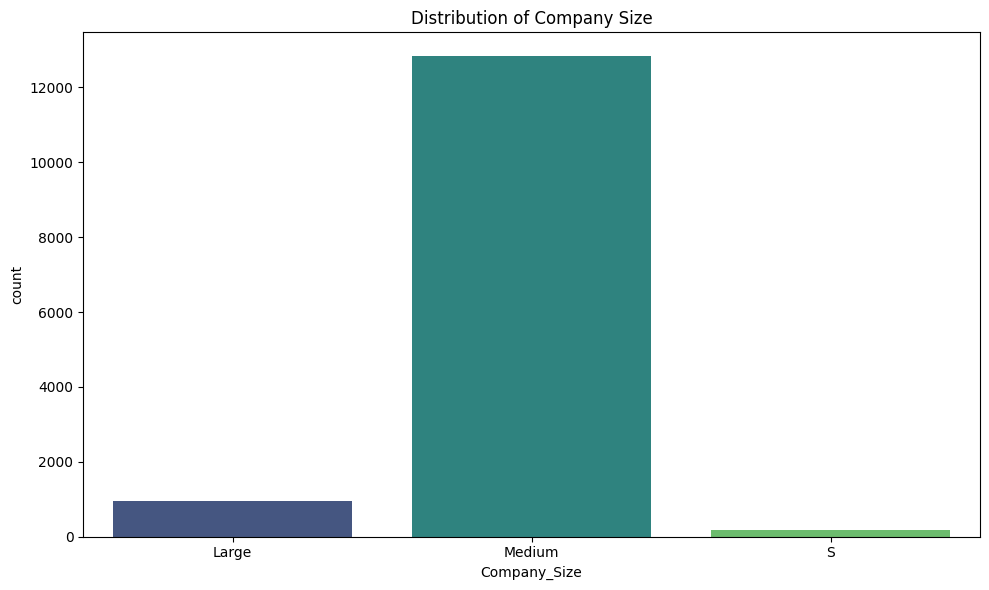

In [39]:
plt.figure(figsize=(10, 6))

# Distribution of Experience Level
sns.countplot(x='Experience_Level', data=df, palette='Set1')
plt.title('Distribution of Experience Level')
plt.tight_layout()
plt.show()

# Distribution of Salary
mean_salary = df['Salary'].mean()
std_salary = df['Salary'].std()
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, color='lightseagreen', stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_salary, std_salary)
plt.plot(x, p, 'k', linewidth=2)
plt.text(xmax*0.8, max(p)*0.9,
         f'Mean: {mean_salary:.2f}\nStd Dev: {std_salary:.2f}', fontsize=12, color='black')
plt.title('Salary Distribution with Overlay of Normal Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Distribution of Company Size
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Size', data=df, palette='viridis')
plt.title('Distribution of Company Size')
plt.tight_layout()
plt.show()

## distribution of salaries across job titles for top 10 jobs
We also graphed the salary distribution for the top 10 job titles

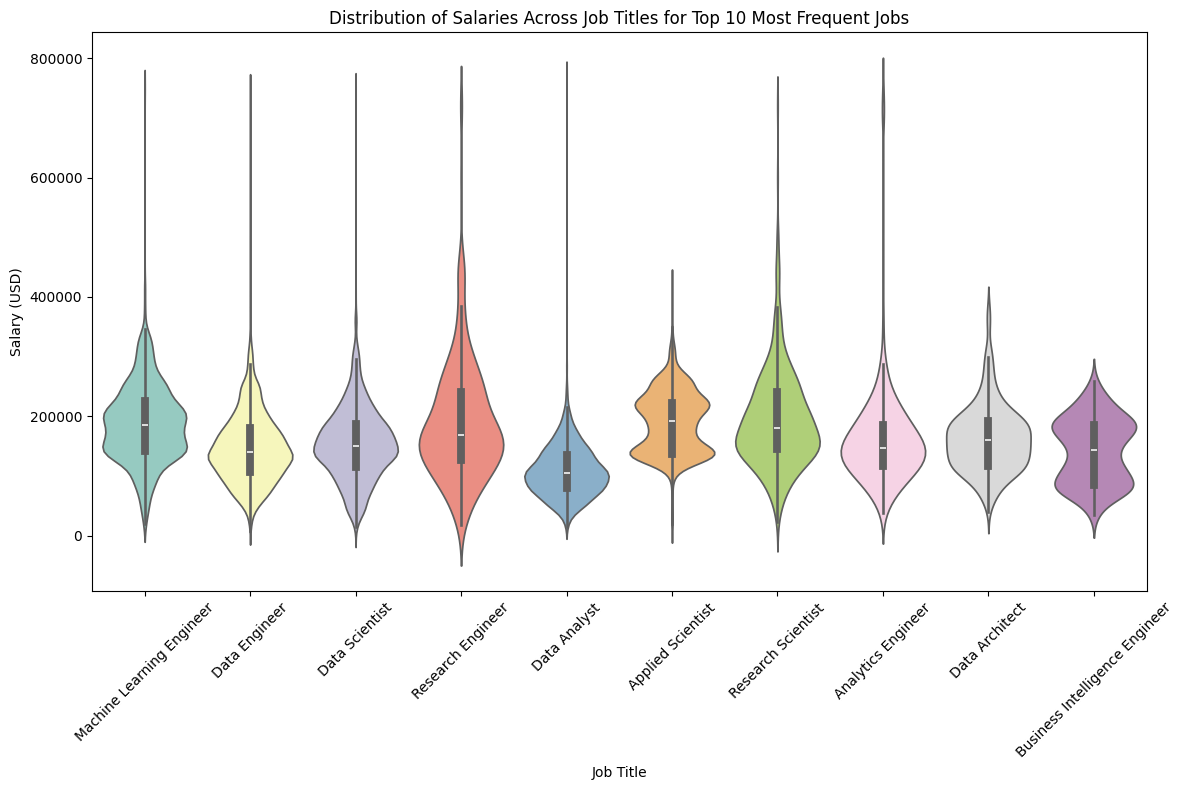

In [40]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Job_Title', y='Salary', data=df_top_10_jobs, palette='Set3')
plt.title('Distribution of Salaries Across Job Titles for Top 10 Most Frequent Jobs')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## income comparison between remote and non-remote workers
The differnce of income between people who work 0, 50, and 100 percent of their time remotely is shown by violin plots. there seems to be not much of a difference between full remote workers and non remote workers but people who work 50/50 seem to be earning less but the variance for all 3 seem to be the same.

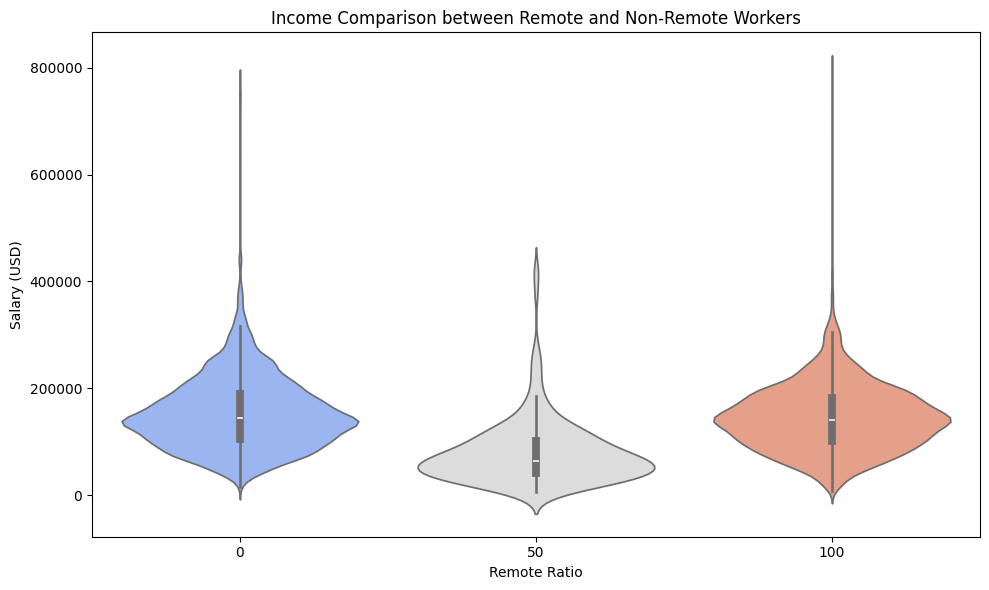

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Remote_Ratio', y='Salary', data=df, palette='coolwarm')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (USD)')
plt.title('Income Comparison between Remote and Non-Remote Workers')
plt.tight_layout()
plt.show()